In [2]:
# src/train_cnn.py (Simple CNN baseline)
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

train_dir = '../data/train'
val_dir = '../data/val'

IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
)

print("")


Found 5286 images belonging to 2 classes.
Found 1132 images belonging to 2 classes.



## When should use Raw CNN
Row CNN means: Conv --> Pool --> Conv --> Pool --> Flatten --> Dense --> Output
1. Learning purpose
2. How convolution, pooling and dense layers work.
3. Small dataset
4. Prototyping and Debugging
## When shouldn't use RAW CNN?
1. Large dataset like ImageNet, CNN won't make it scalable.
2. For task where pretrained transfer learning is available.
3. For competition.

In [10]:
# RAW CNN Model
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])

model.summary()

TensorFlow version: 2.20.0
GPUs: []


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
 51/166 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.6355 - loss: 0.6619

/Users/sifat/Desktop/real-time-mask-detection/.venv/lib/python3.12/site-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.7150 - loss: 0.5676

/Users/sifat/Desktop/real-time-mask-detection/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 123ms/step - accuracy: 0.7872 - loss: 0.4702 - val_accuracy: 0.8772 - val_loss: 0.2983
Epoch 2/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.8657 - loss: 0.3271 - val_accuracy: 0.8975 - val_loss: 0.2454
Epoch 3/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 23s 141ms/step - accuracy: 0.8802 - loss: 0.2953 - val_accuracy: 0.9081 - val_loss: 0.2324
Epoch 4/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.8835 - loss: 0.2859 - val_accuracy: 0.8905 - val_loss: 0.2572
Epoch 5/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.8952 - loss: 0.2634 - val_accuracy: 0.9205 - val_loss: 0.2061
Epoch 6/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.8965 - loss: 0.2568 - val_accuracy: 0.9170 - val_loss: 0.2052
Epoch 7/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.9007 - loss: 0.2412 - val_accuracy: 0.9276 - val_loss: 0.1878
Epoch 8/15
166/166 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.9031 - loss: 0.2403 - val

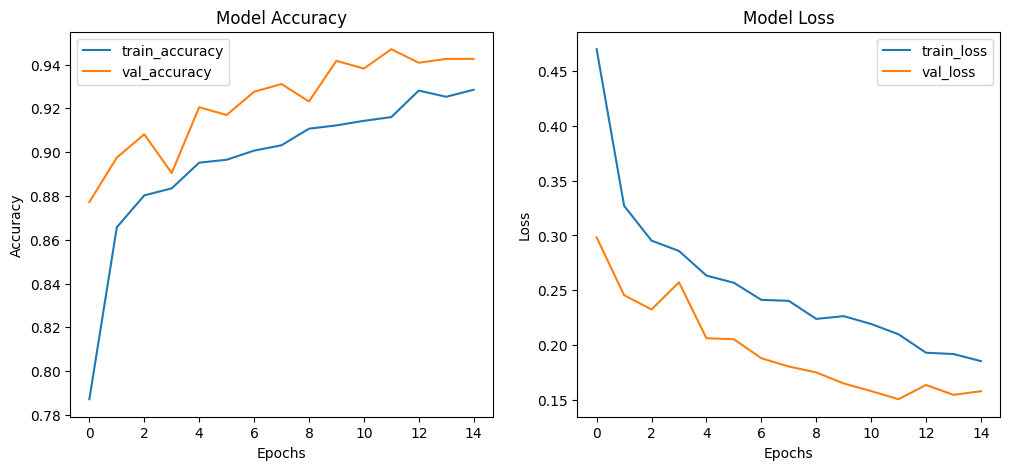

In [7]:
model.compile(
    optimizer=Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stop],
)

model.save('../models/cnn_model_v2.h5')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
# src/train_vgg16.py (VGG16 Transfer Learning)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

# Load VGG16 base model
base_model = VGG16(include_top=False, input_shape=(*IMG_SIZE, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(
    optimizer=Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stop],
)

model.save('../models/vgg16_model.h5')



Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)

In [12]:
# src/train_resnet.py (ResNet50 Transfer Learning)
# Python
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

# Build base model
base_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(128, 128, 3)
)

# Freeze base model if doing feature extraction first
base_model.trainable = False

# Build classification head on top of base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# IMPORTANT: Use base_model.input (a KerasTensor), not the model itself
model = Model(inputs=base_model.input, outputs=output)
model.summary()
model.compile(
    optimizer=Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stop],
)

model.save('../models/resnet50_model.h5')


Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/resnet/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1010)